# Newtons Metode

Mål: løs ligninger på formen $f(x) = 0$ for en funksjon $f \colon \mathbb{R} \to \mathbb{R}$. 

Se kapittel 2 i [kompendiet](https://mitt.uib.no/courses/45603/files?preview=5619281) for mere om dette. 

In [1]:
# Her importeres en quizz modul for jupyter.
# Hvis den ikke allerede er installert blir den installert.
try:
  from jupyterquiz import display_quiz
except:
  !pip install jupyterquiz
  from jupyterquiz import display_quiz

## [Eksempel fra Wikipedia](https://no.wikipedia.org/wiki/Newtons_metode)

La $f(x) = e^x + 2x$.

**Mål**: Finn et tall $x$ slik at $f(x) = 0$.

## Visualisering

Vi prøver å plotte funksjonen.

In [2]:
# importerer numpy for enkelt å kunne jobbe med lister av tall.

import numpy as np

In [3]:
# importerer matplotlib for å kunne tegne funksjoner

import matplotlib.pyplot as plt

In [4]:
x = np.linspace(-1, 1, num=100)

In [5]:
def f(x):
    return np.exp(x) + 2*x

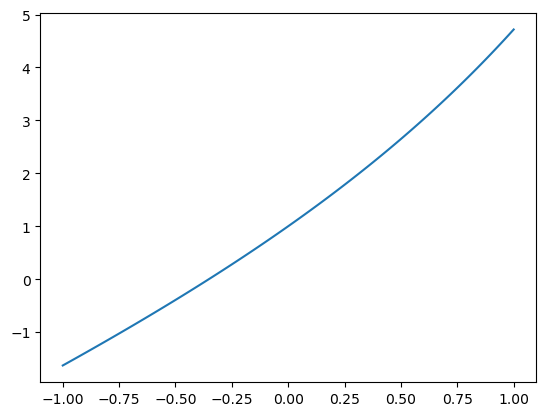

In [6]:
plt.plot(x, f(x))

### Oppgave

Tegn akser på figuren og marker dem med symbolene `x` og `y`.

## Observasjon:

På figuren krysser grafen x-aksen. Siden funksjonen $f$ er kontinuerlig vet vi at det finnes en løsning til ligningen $f(x) = 0$.

## Newtons metode:

Metoden til newton har flere steg som alle bruker samme ide:

Ut i fra funksjonen $f$ kan vi lage en ny funksjon $N$ ved formelen $$N(x) := x - \frac{f(x)}{f'(x)}.$$

Her er $f'(x)$ den deriverte av funksjonen $f(x)$. Hvis $f'(x) = 0$ har vi et problem!

### Eksempel

For $$f(x) = e^x + 2x$$ er $$f'(x) = e^x + 2.$$

Derfor er 

$$N(x) := x - \frac{f(x)}{f'(x)} = x - \frac{e^x + 2x}{e^x + 2}.$$

Setter vi $x = 0.8$ får vi

$$N(x) = N(0.8) = 0.8 - \frac{e^{0.8} + 2\cdot 0.8}{e^{0.8} + 2}$$

### Illustrasjon

Vi kan illustrere dette ved velge å $x = 0.8$ og tegne tangenten til grafen for $f$ i punktet $(x, f(x))$.

Det vil gjøre det enklere å endre på koden vi skriver hvis vi sriver $x{\_}start = 0.8$.

In [7]:
x_start = 0.8

In [8]:
# Vi har allerede fortalt python om funksjonen f
# her forteller vi python om den deriverte funksjonen til f

def df(x):
    return np.exp(x) + 2

In [9]:
# Her forteller vi om formelen for tangenten til f i punktet (x_tangent, f(x_tangent))

def tangent(F, dF, x, x_tangent):
    return (x - x_tangent) * dF(x_tangent) + F(x_tangent)

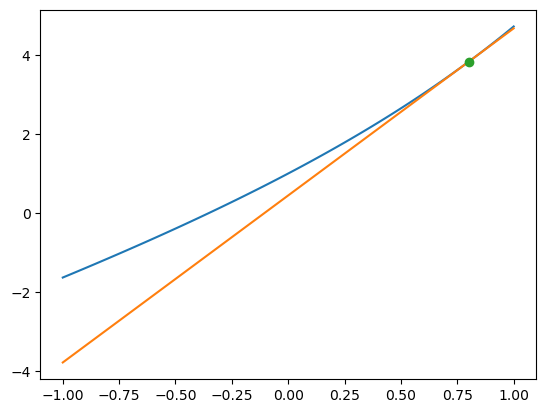

In [10]:
# Vi begynner med å tegne grafen til f sammen med tangenten og tangentpunktet (x_start, f(x_start))
plt.plot(x, f(x))
plt.plot(x, tangent(f, df, x, x_tangent=x_start))
plt.plot(x_start, f(x_start), 'o')

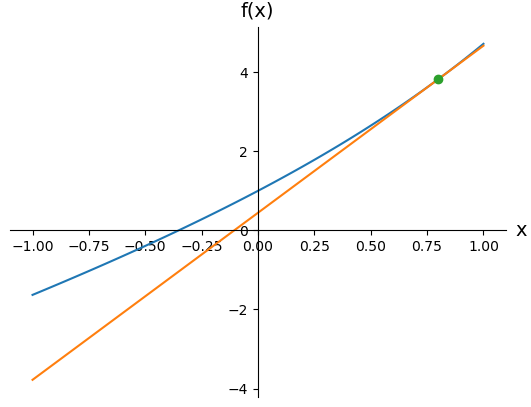

In [11]:
# Nå lager vi en figur med akser

ax = plt.gca()

ax.plot(x, f(x))
ax.plot(x, tangent(f, df, x, x_tangent=x_start))
ax.plot(x_start, f(x_start), 'o')

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel(r'f(x)', size=14, labelpad=-21, y=1.02, rotation=0)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Vi skriver $x_1 = N(x{\_}start)$ og tegner $(x_1, f(x_1))$ inn på figuren.

In [12]:
# Vi forteller python om funksjonen N

def newton_funksjon(x, funksjon, derivert):
    return x - funksjon(x) / derivert(x)

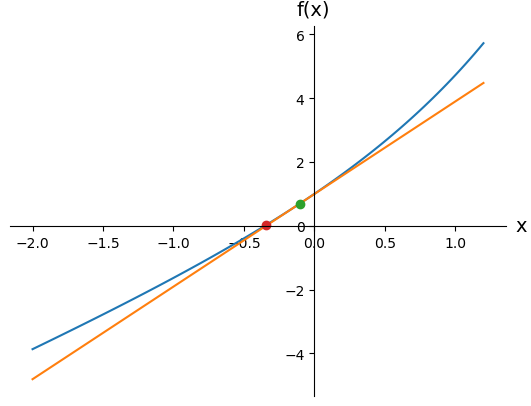

In [36]:
# Nå lager vi en figur med akser

ax = plt.gca()

ax.plot(x, f(x))
ax.plot(x, tangent(f, df, x, x_tangent=x_start))
ax.plot(x_start, f(x_start), 'o')
x_1 = newton_funksjon(x_start, f, df)
ax.plot(x_1, f(x_1), 'o')

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel(r'f(x)', size=14, labelpad=-21, y=1.02, rotation=0)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Vi kan se om $x_1$ er et nullpunkt for $f$ eller om $f(x_1)$ er liten.

In [14]:
x_1, f(x_1)

(np.float64(-0.10533756345777334), np.float64(0.6893455303015643))

Vi kan nå fortsette ved å sette $x_2 = N(x_1)$ og beregne $f(x_2)$

In [37]:
x_2 = newton_funksjon(x_1, f, df)

x_2, f(x_2)

(np.float64(-0.3517238458879976), np.float64(2.6670716843257836e-05))

### Visualisering av steg 2

Vi kan gjenbruke koden vi hadde over for å vise tangenten i $x_1$.

I stedet for å endre koden setter vi $x{\_}{start} = x_1$, det vil si at vi erstatter verdien
til $x{\_}{start}$ med verdien til $x_1$. Da kan koden over kjøres som den er.

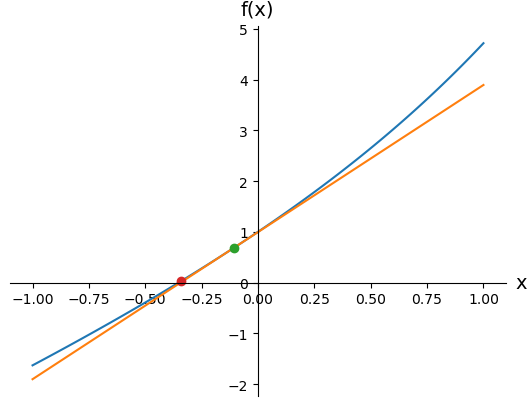

In [16]:
x_start = x_1

# Kopierer koden over

# Nå lager vi en figur med akser

ax = plt.gca()

ax.plot(x, f(x))
ax.plot(x, tangent(f, df, x, x_tangent=x_start))
ax.plot(x_start, f(x_start), 'o')
x_1 = N(x_start)
ax.plot(x_1, f(x_1), 'o')

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel(r'f(x)', size=14, labelpad=-21, y=1.02, rotation=0)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Newtons metode fortsatt:

* Start med et tall $x_0$ 
* Sett $x_1 = N(x_0)$
* Sett $x_2 = N(x_1)$
* fortsett slik ved rekursivt å sette $x_{n+1} = N(x_n)$
* stopp når $f(x_n)$ er så liten som du ønsker

Det vil si når vi kjenner $x_0, x_1, \dots, x_n$ kan vi beregne $x_{n+1}$ ved formelen $x_{n+1} = N(x_n)$.

## Newton kode

Det eneste vi mangler er automatisk å fortsette med å beregne $N(x_n)$ og å beslutte når vi vil stoppe.

En løsning er å si gi python en parameter `antall iterasjoner` som sier hvor mange x'er som skal beregnes.

In [39]:
def newton_raphson(funksjon, derivert, x_start, antall_iterasjoner=100):
    """
    Finner rot i en funksjon `funksjon` gitt dens deriverte funksjon `derivert`
    """        
    x = x_start
    for _ in range(max_n):
        x = newton_funksjon(x, funksjon, derivert)
    return x

In [34]:
x_n = newton_raphson(f, df, x_start=0.8, toleranse=1e-10)

In [35]:
x_n, f(x_n)

(np.float64(-0.3517337112365333), np.float64(3.423272776359454e-11))

### Oppgave:

Foreslå forbedringer til funksjonen `newton_rapson` over.

## Forklaring

Metoden til Newton er ganske godt forklart på den engelske [Wikipedia siden Newton's Method](https://en.wikipedia.org/wiki/Newton's_method).
La oss si at vi gjetter på at $x_n$ er en løsning til ligningen $f(x) = 0$. Vi ønsker å forbedre gjettet.

![Newtons Metode](Newton_iteration.svg)

Ligningen til den røde linjen er $y(x) = f'(x_n)(x - x_n) + f(x_n)$. Tallet $x_{n+1}$ er slik at $y(x_{n+1}) = 0$. 


**Forklar til personen ved siden av deg hvorfor $x_{n+1} = x_n - \frac{f(n_n)}{f'(x_n)}$ gir $y(x_{n+1}) = 0$.**

Hvorfor tror du $x_{n+1}$ er et bedre gjett enn $x_n$ på en løsning til ligningen $f(x) = 0?$

Starter vi med en initialverdi $x_0$ kan vi spørre om hva det er for tall $x_1, x_2, \dots$ som blir generert i Newtons metode, og hva funksjonsverdiene til disse tallene er. For å se dette kan vi endre litt på koden. 

In [40]:
def newton_rapson_liste(x_start, funksjon, derivert, antall_iterasjoner=10):
    """
    Finner en rot til funksjonen funksjon(x) ved hjelp av Newton sin metode

    Args:
        x_start: første gjett på en rot til funksjonen kalt funksjon
        funksjon: funksjonen vi vil bruke
        derivert: den deriverte funksjon til funksjonen vi vil bruke

    Returns:
       En numpy array med alle gjett på verdien til x som ble gjort i algoritmen 
    """
    xer = [x_start]
    for _ in range(antall_iterasjoner):
        xer.append(newton_funksjon(xer[-1], funksjon, derivert))
    return np.array(xer)      

In [44]:
x_0 = 0.8
xx = newton_rapson_liste(x_start=x_0, funksjon=f, derivert=df, antall_iterasjoner=10)

Vi kan nå lage figurer av hvordan gjettene på røtter ser ut.

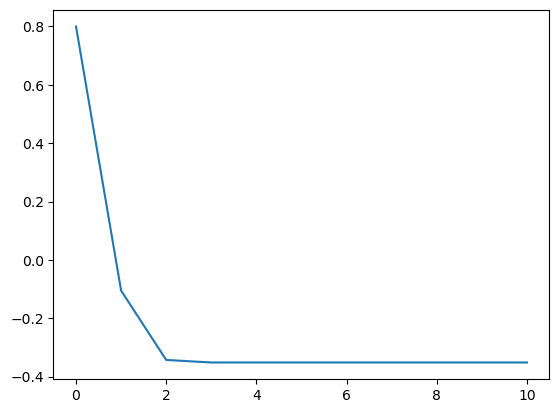

In [45]:
plt.plot(xx)

Vi kan også lage figurer av hvordan funksjonsverdiene til gjettene på røtter ser ut.

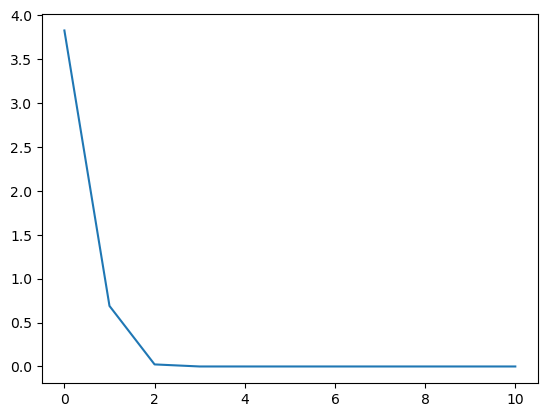

In [46]:
plt.plot(f(xx))

### Oppgave

**For funksjonen $f(x) = exp(x) + 5*x$, start med et gjett $x_0 = 0$ på en løsning til ligningen $f(x) = 0?$
Modifiser koden over til å finne $x_1$, $x_2$ og $x_3$**

## Skjæring, kontinuitet og Newtons metode

En typisk oppgave om Newtons metode består i å forklare hvorfor vi kan være sikre på at en funksjon
har et nullpunkt, og deretter bruke Newtons metode til å prøve å finne det.

Eksempel

**Se på funksjonen f(x) = exp(x) + 2*x.**

**Forklar hvorfor funksjonen har et nullpunkt i intervallet (−1, 0), og bruk Newtons metode til å finne
nullpunktet.**


Dette er den funksjonen vi allerede har jobbet med, så vi har allerede funnet nullpunkt for den.

For å se om den har et nullpunkt i intervallet $(-1,0)$ ser vi på funksjonsverdiene i endepunktene:

In [28]:
f(-1), f(0)

(np.float64(-1.6321205588285577), np.float64(1.0))

Vi ser at funksjonen $f$ har forskjellig fortegn i endepunktene. Siden $f$ er kontinuerlig gir skjæringssetningen (MIP teorem 4.3.1) at $f$ har et nullpunkt i intervallet.

### Oppgave

**Se på ligningen** 2*cos(x) = x.

**Forklar hvorfor ligningen har en løsning i intervallet (0,2), og bruk Newtons metode til å finne løsningen.**  

**Tegn også en figur som illustrerer dette**

## Advarsel:

Ting kan gå galt. Selv om et nullpunkt finnes kan metoden til Newton feile. Det er mye å si om dette. Det står litt om dette i kompendiet.

## Å finne røtter med scipy

Det er [metoder i pakken `scipy` som finner røtter til funksjoner.](https://docs.scipy.org/doc/scipy-1.15.0/reference/optimize.html#root-finding) 
La oss se hvordan vi kan bruke metoden til Newton hentet derfra.

In [29]:
from scipy.optimize import newton

Vi blir fortalt dette om den newton funksjonen

`newton(func, x0[, fprime, args, tol, ...])`

Vi forsøker å bruke metoden.

In [30]:
newton(f, 1, df)

np.float64(-0.3517337112491958)

Det virket som om vi ikke trenger å angi den deriverte funksjonen til funksjonen f. Er det virkelig sant?

In [31]:
newton(f, 1)

np.float64(-0.35173371124919584)